In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import yfinance as yf 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import objective_functions 
from pypfopt import expected_returns 
from IPython.display import display_html

plt.style.use('seaborn-v0_8-darkgrid')  
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
pairs_selected = ['ARSSINFRA.NS-DHARSUGAR.NS', 'ASHOKLEY.NS-NATIONALUM.NS',
       'SUNDARAM.NS-SUPERSPIN.NS', 'CREST.NS-V2RETAIL.NS',
       'INDORAMA.NS-JINDALPHOT.NS', 'MADHAV.NS-NAHARINDUS.NS',
       'BIRLAMONEY.NS-EMKAY.NS', 'AMDIND.NS-BAGFILMS.NS',
       'ALPA.NS-MCDHOLDING.NS', 'ALKALI.NS-SALSTEEL.NS']   

In [3]:
pair_list = [col.split('-') for col in pairs_selected] 
symbols = [item for sublist in pair_list for item in sublist]   

In [4]:
start_date = '2015-01-01'
end_date = '2021-12-20'

test_start = '2022-01-01'
test_end = '2024-06-30' 

tickers = list(set(symbols))  
len(tickers)  

20

In [5]:
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
nifty = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

data_test = yf.download(tickers, start=test_start, end=test_end)['Adj Close']
nifty_test = yf.download('^NSEI', start=test_start, end=test_end)['Adj Close'] 

[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
tickers 

['NATIONALUM.NS',
 'ARSSINFRA.NS',
 'CREST.NS',
 'V2RETAIL.NS',
 'AMDIND.NS',
 'NAHARINDUS.NS',
 'SALSTEEL.NS',
 'JINDALPHOT.NS',
 'DHARSUGAR.NS',
 'BAGFILMS.NS',
 'ALPA.NS',
 'ASHOKLEY.NS',
 'BIRLAMONEY.NS',
 'MADHAV.NS',
 'SUNDARAM.NS',
 'EMKAY.NS',
 'INDORAMA.NS',
 'ALKALI.NS',
 'SUPERSPIN.NS',
 'MCDHOLDING.NS']

In [7]:
ticks_df = pd.DataFrame({'Unnamed: 0':tickers}) 
indices = pd.read_csv('Stocks_Industry.csv') 
merged_inner = pd.merge(indices, ticks_df, on='Unnamed: 0', how='inner') 
merged_inner 

,Unnamed: 0,Industry
0,BAGFILMS.NS,Entertainment
1,BIRLAMONEY.NS,Cement
2,CREST.NS,Travel
3,DHARSUGAR.NS,Sugar
4,EMKAY.NS,Finance
5,INDORAMA.NS,Textiles
6,JINDALPHOT.NS,Transport
7,MADHAV.NS,Misc
8,SALSTEEL.NS,Consumer Goods
9,SUNDARAM.NS,NaN


In [8]:
final_df = data[tickers] 
final_df.head(3) 

Ticker,NATIONALUM.NS,ARSSINFRA.NS,CREST.NS,V2RETAIL.NS,AMDIND.NS,NAHARINDUS.NS,SALSTEEL.NS,JINDALPHOT.NS,DHARSUGAR.NS,BAGFILMS.NS,ALPA.NS,ASHOKLEY.NS,BIRLAMONEY.NS,MADHAV.NS,SUNDARAM.NS,EMKAY.NS,INDORAMA.NS,ALKALI.NS,SUPERSPIN.NS,MCDHOLDING.NS
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,31.903336,38.150002,42.734032,41.099998,22.099163,56.260658,2.55,108.557587,16.9,3.50,13.30,41.258720,32.299999,39.495972,2.4,47.555080,21.724642,16.869980,7.75,30.200001
2015-01-02,31.559683,45.549999,40.861874,41.400002,22.146086,57.684357,2.70,110.684677,17.6,3.35,13.40,42.369530,33.500000,41.197189,2.5,47.191017,20.775967,17.385096,7.80,30.650000
2015-01-05,30.614605,49.000000,39.356007,40.299999,22.005327,57.340706,2.60,113.875313,17.0,3.50,14.05,45.860653,33.500000,40.507507,2.6,47.737103,20.870834,18.372395,7.85,31.299999


In [9]:
returns = final_df.pct_change() 
returns.dropna(inplace=True)
returns.head(3) 

Ticker,NATIONALUM.NS,ARSSINFRA.NS,CREST.NS,V2RETAIL.NS,AMDIND.NS,NAHARINDUS.NS,SALSTEEL.NS,JINDALPHOT.NS,DHARSUGAR.NS,BAGFILMS.NS,ALPA.NS,ASHOKLEY.NS,BIRLAMONEY.NS,MADHAV.NS,SUNDARAM.NS,EMKAY.NS,INDORAMA.NS,ALKALI.NS,SUPERSPIN.NS,MCDHOLDING.NS
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.010772,0.193971,-0.043810,0.007299,0.002123,0.025305,0.058824,0.019594,0.041420,-0.042857,0.007519,0.026923,0.037152,0.043073,0.041667,-0.007656,-0.043668,0.030534,0.006452,0.014901
2015-01-05,-0.029946,0.075741,-0.036853,-0.026570,-0.006356,-0.005957,-0.037037,0.028826,-0.034091,0.044776,0.048508,0.082397,0.000000,-0.016741,0.040000,0.011572,0.004566,0.056790,0.006410,0.021207
2015-01-06,-0.036483,0.003061,-0.039297,-0.035980,-0.017058,-0.021404,-0.057692,-0.034023,-0.005882,-0.071429,-0.007117,-0.021626,-0.025373,-0.052213,-0.019231,-0.021926,-0.031818,-0.056075,-0.057325,-0.025559


In [10]:
mu = expected_returns.mean_historical_return(final_df) 
S = risk_models.sample_cov(final_df) 

In [11]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01,0.20)) 
ef.add_objective(objective_functions.L2_reg, gamma=0.1) 
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 

In [12]:
cleaned_weights 

OrderedDict([('NATIONALUM.NS', 0.07642),
             ('ARSSINFRA.NS', 0.01),
             ('CREST.NS', 0.08821),
             ('V2RETAIL.NS', 0.1027),
             ('AMDIND.NS', 0.01),
             ('NAHARINDUS.NS', 0.01),
             ('SALSTEEL.NS', 0.10123),
             ('JINDALPHOT.NS', 0.03726),
             ('DHARSUGAR.NS', 0.01),
             ('BAGFILMS.NS', 0.01),
             ('ALPA.NS', 0.15245),
             ('ASHOKLEY.NS', 0.08232),
             ('BIRLAMONEY.NS', 0.01),
             ('MADHAV.NS', 0.01),
             ('SUNDARAM.NS', 0.01),
             ('EMKAY.NS', 0.01),
             ('INDORAMA.NS', 0.01),
             ('ALKALI.NS', 0.12624),
             ('SUPERSPIN.NS', 0.01),
             ('MCDHOLDING.NS', 0.12318)])

In [13]:
ef.portfolio_performance(verbose=True) 

Expected annual return: 20.0%
Annual volatility: 29.1%
Sharpe Ratio: 0.62


(0.20030846458463641, 0.29055455250665846, 0.6205666475678587)

#### Pie Chart for portfolio weights

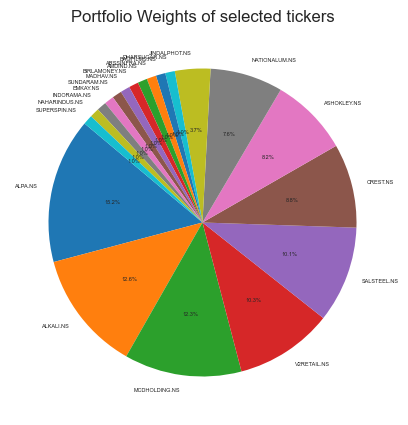

In [14]:
weight_series = pd.Series(cleaned_weights).sort_values(ascending=False)
plt.figure(figsize=(5,5)) 
weight_series.plot(kind='pie', autopct='%1.1f%%', startangle=140, textprops={'fontsize':4},
                    title='Portfolio Weights of selected tickers') 
plt.axis('off') 
plt.show() 

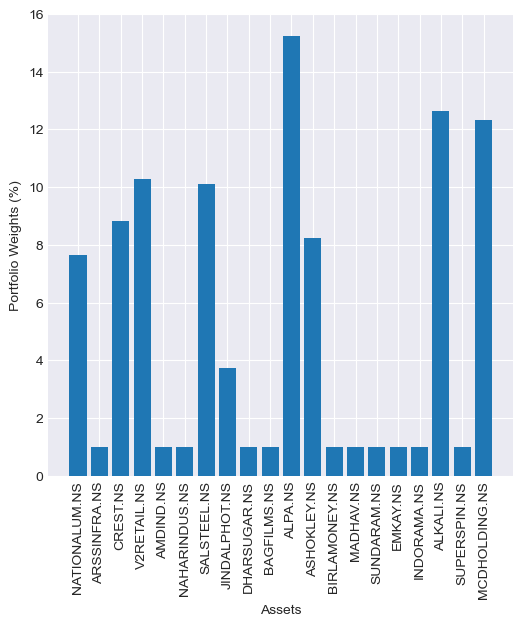

In [15]:
plt.figure(figsize=(6,6)) 

weight_values = list(cleaned_weights.values())
weights_percentage = [w*100 for w in weight_values]

plt.bar(cleaned_weights.keys(), weights_percentage)
plt.xlabel('Assets')
plt.ylabel('Portfolio Weights (%)') 
plt.xticks(rotation=90)
plt.show() 

### Returns for Buy and Hold strategy for a period of 2021-2023

In [16]:
test_df = data_test[tickers]  

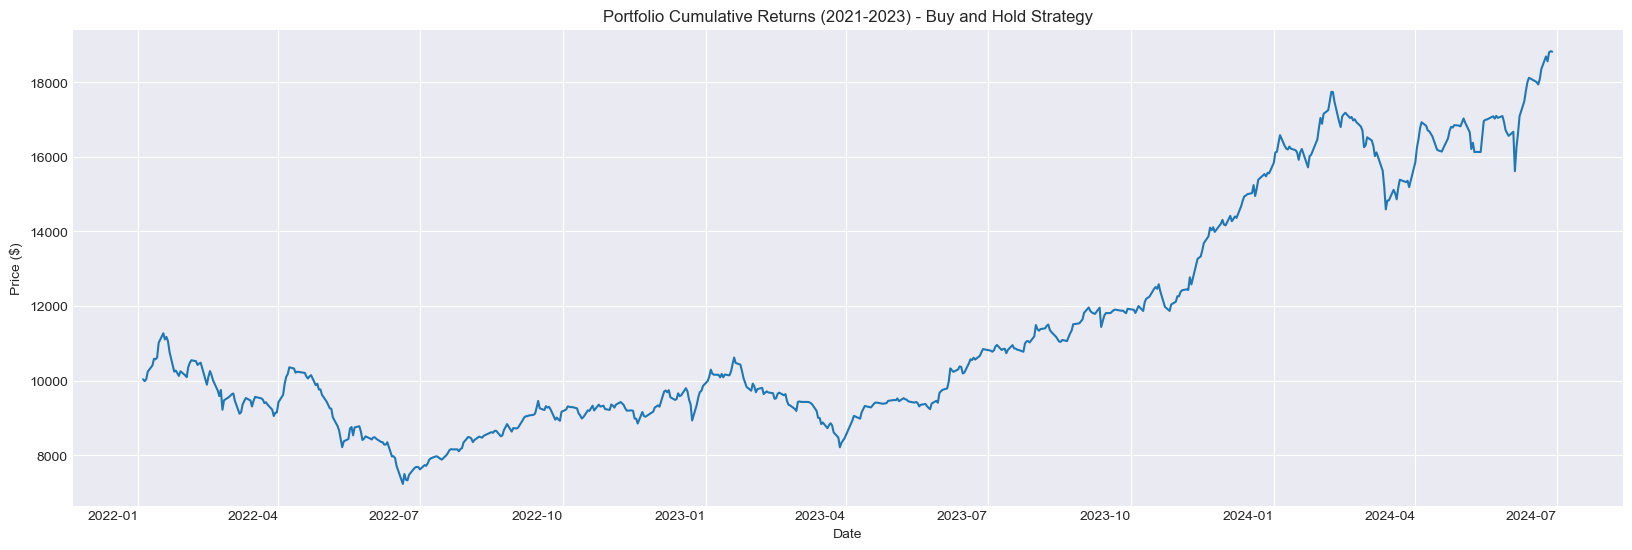

In [17]:
# Calculate daily returns for the period 2021-2023
daily_returns_bnh = test_df.pct_change() 
initial_capital = 10000

# Calculate portfolio returns using the optimized weights from 2015-2020
portfolio_returns_bnh = daily_returns_bnh.dot(pd.Series(cleaned_weights)) 
cumulative_returns_bnh = (1+portfolio_returns_bnh).cumprod()*initial_capital 

# Plot cumulative returns for the period 2021-2023
cumulative_returns_bnh.plot(figsize=(20,7), title='Portfolio Cumulative Returns (2021-2023) - Buy and Hold Strategy')
plt.ylabel('Price ($)')
plt.xticks(rotation=0)
plt.show() 

### Returns for Trading strategy for a period of 2021-2023

Trading Strategy defined from moving average and z-scores

In [18]:
def strategy(test_df, weights, initial_capital=10000, window1=1, window2=30):
    if window1 == 0 or window2 == 0:
        return 0
    
    # Initialize data structures
    money_list = pd.Series(index=test_df.index)
    money_list.iloc[0] = initial_capital
    
    allocation = {asset: initial_capital * weight for asset, weight in weights.items()}
    initial_allocation = allocation.copy()  # Store initial allocation
    df_portfolio = pd.DataFrame(index=test_df.index) 
    final_values = {}  # Dictionary to store final values of each stock
    portfolio_value = [] # To store portfolio values over time 

    # Process each stock
    for stock in test_df.columns:
        price = test_df[stock] 
        ma1 = price.rolling(window=window1, center=False).mean() 
        ma2 = price.rolling(window=window2, center=False).mean() 
        std = price.rolling(window=window2, center=False).std() 

        zscore = (ma1 - ma2) / std 

        # Initialize trading variables
        stock_count, profit, position_entered, first_price = 0, 0, 0, 0

        for i in range(len(price)):

            current_value = sum(allocation[stock] for stock in allocation) + stock_count * price[i]
            portfolio_value.append(current_value)
            money_list.iloc[i] = current_value 

            if zscore[i] < -1.5 and allocation[stock] > price[i] and position_entered == 0: # Buy
                stock_count = int(allocation[stock] / price[i]) 
                first_price = price[i] 
                allocation[stock] -= stock_count * price[i]
                position_entered = 1 

            elif zscore[i] > 1.5 and allocation[stock] > price[i] and position_entered == 1: # Sell    
                profit = stock_count * (price[i] - first_price) 
                allocation[stock] += stock_count * price[i] + profit 
                stock_count = 0
                position_entered = 0

            elif abs(zscore[i]) < 0.1 and position_entered == 1: # Sell and clear
                profit = stock_count * (price[i] - first_price) 
                allocation[stock] += stock_count * price[i] + profit
                stock_count = 0
                position_entered = 0  

            df_portfolio.loc[price.index[i], stock] = (allocation[stock] + price.iloc[i] * stock_count).round(2) 

        # Calculate final value of the stock
        final_value = (allocation[stock] + price.iloc[-1] * stock_count).round(2)
        final_values[stock] = final_value

    df_portfolio["Portfolio_rets"] = df_portfolio.sum(axis=1) 
    df_portfolio.round(decimals = 4).dropna()         
        
    # Calculate total portfolio value
    total_value = sum(final_values.values())
    print(f"Total portfolio value at the end of the period: ${total_value:.4f}")

    portfolio_ret = pd.DataFrame(index=test_df.columns)  
    portfolio_ret['Initial_allocation($)'] = portfolio_ret.index.map(initial_allocation)  
    portfolio_ret['Final Values($)'] = portfolio_ret.index.map(final_values)  

    return portfolio_ret, df_portfolio   

portfolio_ret, portfolio_df = strategy(test_df, cleaned_weights)  

Total portfolio value at the end of the period: $26402.2700


In [19]:
df1 = portfolio_ret.iloc[:10,:] 
df2 = portfolio_ret.iloc[10:,:] 

def display_side_by_side(*dfs):
    html_str = ''
    for df in dfs:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

# Display the DataFrames side by side
display_side_by_side(df1, df2) 

,Initial_allocation($),Final Values($)
Ticker,,
NATIONALUM.NS,764.2,476.96
ARSSINFRA.NS,100.0,87.88
CREST.NS,882.1,2237.33
V2RETAIL.NS,1027.0,4254.25
AMDIND.NS,100.0,226.75
NAHARINDUS.NS,100.0,84.90
SALSTEEL.NS,1012.3,2727.70
JINDALPHOT.NS,372.6,212.40
DHARSUGAR.NS,100.0,40.00


In [20]:
portfolio_df.tail(1) 

,NATIONALUM.NS,ARSSINFRA.NS,CREST.NS,V2RETAIL.NS,AMDIND.NS,NAHARINDUS.NS,SALSTEEL.NS,JINDALPHOT.NS,DHARSUGAR.NS,BAGFILMS.NS,...,ASHOKLEY.NS,BIRLAMONEY.NS,MADHAV.NS,SUNDARAM.NS,EMKAY.NS,INDORAMA.NS,ALKALI.NS,SUPERSPIN.NS,MCDHOLDING.NS,Portfolio_rets
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-28,476.96,87.88,2237.33,4254.25,226.75,84.9,2727.7,212.4,40.0,116.2,...,1052.44,86.6,66.54,83.25,86.88,77.6,7390.35,72.0,317.9,26402.27


In [21]:
# Total return
print('='*20,'Statistics for Buy and Hold Strategy (2022-2024)','='*20)
print() 
total_return_bnh = (cumulative_returns_bnh.iloc[-1])/initial_capital - 1
print(f'Initial Investment : ${initial_capital}') 
print(f'Portfolio value at the end of time frame: ${(cumulative_returns_bnh.iloc[-1]).round(2)}')   
print(f'Profit made : ${(cumulative_returns_bnh.iloc[-1]-initial_capital).round(2)}') 
print() 
print(f'Total Returns : {total_return_bnh:.2%}') 

# Annualized return
annualized_return_bnh = (1 + total_return_bnh) ** (1/3) - 1  # 3 years
print(f'Annualized Returns : {annualized_return_bnh:.2%}')

# Annualized volatility
annualized_volatility_bnh = np.std(portfolio_returns_bnh)*np.sqrt(252) 
print(f'Annualized Volatility : {annualized_volatility_bnh:.2%}')

# Sharpe Ratio
risk_free_rate = 0.01   # Assuming risk free rate of 1%
sharpe_ratio_bnh = (annualized_return_bnh-risk_free_rate)/annualized_volatility_bnh
print(f'Sharpe Ratio : {sharpe_ratio_bnh:.2f}') 

print() 

print('='*20,'Statistics for Trading Strategy (2022-2024)','='*20) 
print() 
total_return_str = (portfolio_df['Portfolio_rets'].iloc[-1])/initial_capital-1 
print(f'Initial Investment : ${initial_capital}') 
print(f'Portfolio value at the end of time frame: ${(portfolio_df['Portfolio_rets'].iloc[-1]).round(2)}')   
print(f'Profit made : ${(portfolio_df['Portfolio_rets'].iloc[-1]-initial_capital).round(2)}') 
print() 
print(f'Total Returns : {total_return_str:.2%}') 

portfolio_returns_str = portfolio_df['Portfolio_rets'].pct_change().dropna()

# Annualized return
annualized_return_str = (1 + total_return_str) ** (1/3) - 1  # 3 years
print(f'Annualized Returns : {annualized_return_str:.2%}')

# Annualized volatility
annualized_volatility_str = np.std(portfolio_returns_str)*np.sqrt(252) 
print(f'Annualized Volatility : {annualized_volatility_str:.2%}')

# Sharpe Ratio
risk_free_rate = 0.01   # Assuming risk free rate of 1%
sharpe_ratio_str = (annualized_return_str-risk_free_rate)/annualized_volatility_str
print(f'Sharpe Ratio : {sharpe_ratio_str:.2f}')  

==================== Statistics for Buy and Hold Strategy (2022-2024) ====================

Initial Investment : $10000
Portfolio value at the end of time frame: $18816.68
Profit made : $8816.68

Total Returns : 88.17%
Annualized Returns : 23.46%
Annualized Volatility : 22.48%
Sharpe Ratio : 1.00

==================== Statistics for Trading Strategy (2022-2024) ====================

Initial Investment : $10000
Portfolio value at the end of time frame: $26402.27
Profit made : $16402.27

Total Returns : 164.02%
Annualized Returns : 38.21%
Annualized Volatility : 20.68%
Sharpe Ratio : 1.80


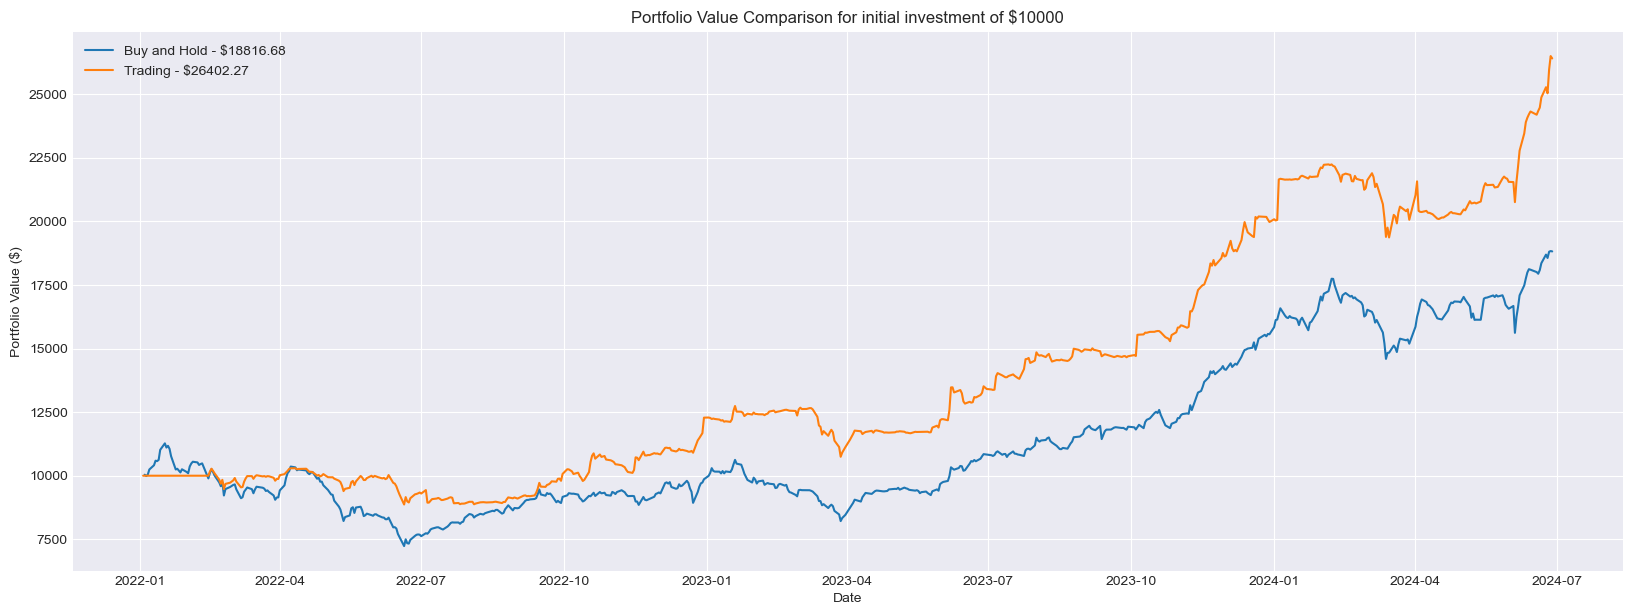

In [22]:
plt.figure(figsize=(20,7))

plt.plot(test_df.index, cumulative_returns_bnh, label=f'Buy and Hold - ${(cumulative_returns_bnh.iloc[-1]).round(2)}')
plt.plot(test_df.index, portfolio_df['Portfolio_rets'], label=f'Trading - ${(portfolio_df['Portfolio_rets'].iloc[-1]).round(2)}')

plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Comparison for initial investment of $10000')
plt.legend()  
plt.show() 